<a href="https://colab.research.google.com/github/ThazSobral/mqtt-vs-http-experiment/blob/main/analyse_mqtt_vs_http.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ajustes do notebook

**Montando** o drive para acesso dos arquivos

In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

Importando as **bibliotecas**

In [14]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importando **dados**

> Os dados foram coletados e filtrados utilizando [Wireshark](https://www.wireshark.org/).

Importando dados do teste com HTTP

In [15]:
packets_http_csv = pd.read_csv('https://raw.githubusercontent.com/ThazSobral/mqtt-vs-http-experiment/main/data/packet-http-one-minute.csv')
# packets_http_json = pd.read_json('/content/drive/My Drive/FACUL CC/FACUL CC 8º SEM/API 8º sem/analyse/data-http/packet-http-one-minute.json')

#filtrar os que utilizam somente o protocolo HTTP
packets_http_csv = packets_http_csv[packets_http_csv['Protocol'] == 'HTTP']

# packets_http_csv
# packets_http_json

Importando dados do teste com MQTT

In [16]:
packets_mqtt_csv = pd.read_csv('https://raw.githubusercontent.com/ThazSobral/mqtt-vs-http-experiment/main/data/packet-mqtt-one-minute.csv')
# packets_mqtt_json = pd.read_json('/content/drive/My Drive/FACUL CC/FACUL CC 8º SEM/API 8º sem/analyse/data-mqtt/packet-mqtt-one-minute.json')

# packets_mqtt_csv
# packets_mqtt_json

# Perguntas

## **Quantos** dados **trafegaram** na rede, tanto **http** quanto **mqtt**?

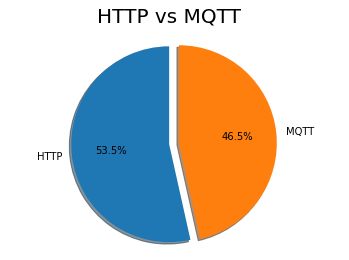

In [17]:
#definir quantidade de dados para cada tipo de pacote
number_of_http = len(packets_http_csv)
number_of_mqtt = len(packets_mqtt_csv)

#definir variaveis
labels = 'HTTP', 'MQTT'
sizes = [number_of_http, number_of_mqtt]
explode = (0, 0.1)

#criar
fig, ax = plt.subplots()
#configurar subplots
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
fig.suptitle('HTTP vs MQTT', size=20)

#mostrar plot
plt.show()

## Quais o **diferentes tamanhos** de pacotes há entre **http** e **mqtt**? E **quantos** pacotes foram **enviados** de cada tipo?

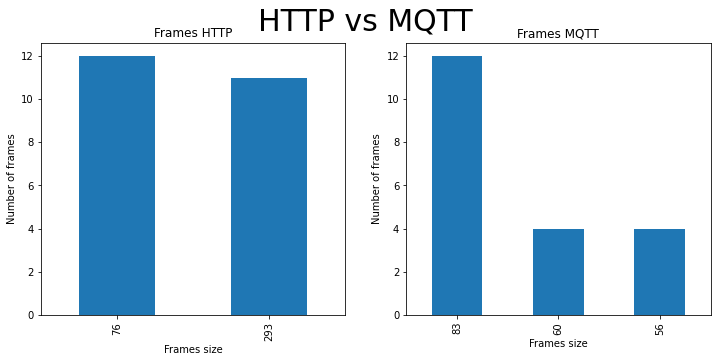

In [18]:
#definir váriaveis
figsize=(12, 5)

#criar subplots
fig, ax = plt.subplots(1, 2, figsize=figsize)
#definir titulo superior
fig.suptitle('HTTP vs MQTT', size=30)

#definir labels para os subplots
x_label_ = 'Frames size'
y_label_ = 'Number of frames'

#criar e definir plot na posição 0
length_packets_http_csv = pd.value_counts(packets_http_csv['Length'])
ax_ = ax[0]
length_packets_http_csv.plot(kind="bar", ax=ax_)
ax_.set_xlabel(x_label_)
ax_.set_ylabel(y_label_)
ax_.set_title('Frames HTTP')

#criar e definir plot na posição 1
length_packets_mqtt_csv = pd.value_counts(packets_mqtt_csv['Length'])
ax_ = ax[1]
length_packets_mqtt_csv.plot(kind="bar", ax=ax_)
ax_.set_xlabel(x_label_)
ax_.set_ylabel(y_label_)
ax_.set_title('Frames MQTT')

#mostrar plot
plt.show()

## Qual a **média** (em **bytes**) desses **dados**, tanto **http** quanto **mqtt**?

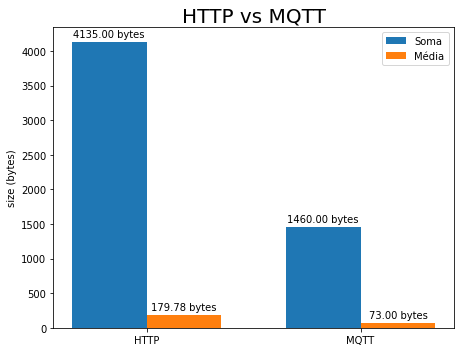

In [19]:
sum_packets_http = packets_http_csv['Length'].sum()
sum_packets_mqtt = packets_mqtt_csv['Length'].sum()
mean_packets_http = sum_packets_http/len(packets_http_csv)
mean_packets_mqtt =  sum_packets_mqtt/len(packets_mqtt_csv)
# print(f'Soma quadros HTTP: {sum_packets_http} bytes\nSoma quadros MQTT: {sum_packets_mqtt} bytes')

sum_datas = [sum_packets_http, sum_packets_mqtt]
mean_datas = [mean_packets_http, mean_packets_mqtt]

labels = ['HTTP', 'MQTT']
x = np.arange(len(labels))
width = 0.35
figsize = (6.5,5)

fig, ax = plt.subplots(figsize=figsize)
rects_sum = ax.bar(x - width/2, sum_datas, width, label='Soma')
rects_mean = ax.bar(x + width/2, mean_datas, width, label='Média')

ax.set_ylabel('size (bytes)')
ax.set_title('HTTP vs MQTT', size=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f bytes'%height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects_sum)
autolabel(rects_mean)

fig.tight_layout()

plt.show()

## **Quanto** é **enviado** e **recebido** pela rede, tanto **http** quanto **mqtt**? (tanto em quantidade quanto em bytes)

In [20]:
# packets_http_csv
device_data_http = packets_http_csv[packets_http_csv['Source'] == '192.168.0.117']
length_device_data_http = device_data_http['Length'].sum()
server_data_http = packets_http_csv[packets_http_csv['Source'] == '192.168.0.109']
length_server_data_http = server_data_http['Length'].sum()

# packets_mqtt_csv
device_data_mqtt = packets_mqtt_csv[packets_mqtt_csv['Source'] == '192.168.0.117']
length_device_data_mqtt = device_data_mqtt['Length'].sum()
server_data_mqtt = packets_mqtt_csv[packets_mqtt_csv['Source'] == '192.168.0.109']
length_server_data_mqtt = server_data_mqtt['Length'].sum()

# print(f'''
# HTTP\n{legth_device_data_http} bytes send to server\n{legth_server_data_http} bytes send to device\n
# {len(device_data_http)} frames send to server\n{len(server_data_http)} frames send to device\n
# MQTT\n{legth_device_data_mqtt} bytes send to server\n{legth_server_data_mqtt} bytes send to device\n
# {len(device_data_http)} frames send to server\n{len(server_data_http)} frames send to device\n
# ''')

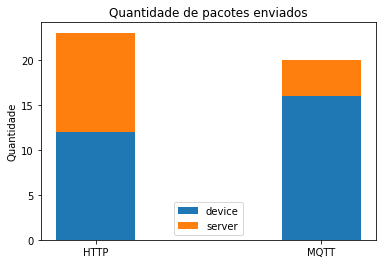

In [21]:
labels = ['HTTP', 'MQTT']
men_means = [len(device_data_http), len(device_data_mqtt)]
women_means = [len(server_data_http), len(server_data_mqtt)]

width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, label='device', )
ax.bar(labels, women_means, width, bottom=men_means, label='server')

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de pacotes enviados')
ax.legend()

plt.show()

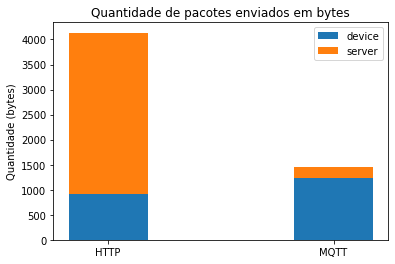

In [22]:
labels = ['HTTP', 'MQTT']
men_means = [length_device_data_http, length_device_data_mqtt]
women_means = [length_server_data_http, length_server_data_mqtt]

width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, label='device', )
ax.bar(labels, women_means, width, bottom=men_means, label='server')

ax.set_ylabel('Quantidade (bytes)')
ax.set_title('Quantidade de pacotes enviados em bytes')
ax.legend()

plt.show()